## Problem 3

Description
Perform a simple regression analysis of Honeywell stock prices versus periods (i.e., 1, 2, 3,…) to forecast the Honeywell stock value for 4/16/2018. Calculate the MSE of this forecast and compare its value with those obtained from parts (1) and (2) of previous problems.

Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import gamma,dgamma,chi2,norm
%matplotlib inline

Read the honeywell file and write it to a dataframe

In [3]:
df = pd.read_excel("Honeywell.xlsx")
cols = df.columns.values
cols = ['Period', 'Date', 'Close', 'Volume']

#### a) Coefficients of correlation and determination, and the interpretations of their values

One of the assumptions of our model is that there isn't any Perfect multicollinearity. Multicollinearity is where one of the explanatory variables is highly correlated with another explanatory variable. In essence, one of the X variables is almost perfectly correlated with another or multiple X variables. Here we do not see such multicollinearity.

,Period,Close,Volume
Period,1.000000,0.063095,0.165801
Close,0.063095,1.000000,0.291918
Volume,0.165801,0.291918,1.000000


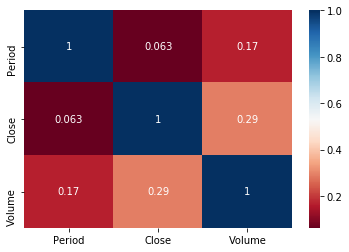

In [4]:
# calculate the correlation matrix
corr = df.corr()
# display the correlation matrix
display(corr)
# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu',annot = True)

### Simple Linear Regression 

The first thing we need to do is, define our exploratory variables and our explanatory variable. From here, let's split the data into a training and testing set. After splitting the data, we will create an instance of the linear regression model and pass through the X_train and y_train variables using the fit() function.

In [5]:
period = [i for i in range(124)]
close = df['Close']

X = df[['Period']]
y = df[['Close']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y)

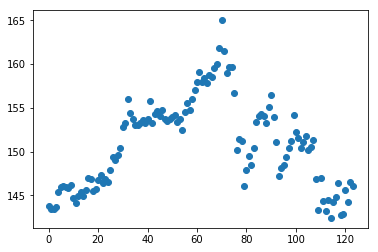

In [6]:
plt.scatter(period, close , marker='o')

In [7]:
# create a Linear Regression model object
regression_model = LinearRegression()
regression_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Intercept and Coefficient
With the data now fitted to the model, we can explore the output. The first thing we should do is look at the intercept of the model, and then we will print out each of the coefficients of the model.

The intercept term is the value of the dependent variable when all the independent variables are equal to zero. For each slope coefficient, it is the estimated change in the dependent variable for a one unit change in that particular independent variable, holding the other independent variables constant.

For example, if all the independent variables were equal to zero, then the close value of honeywell would be 150. If we looked at the close value while holding all the other independent variables constant, then we would say for a 1 unit increase in close value would lead to a 0.0089% increase in close value

In [8]:
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

In [9]:
print("The Intercept for our model is {:.4}".format(intercept))
print('-'*100)
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The Intercept for our model is 150.4
----------------------------------------------------------------------------------------------------
The Coefficient for Period is 0.0089


#### Prediction 
We can also now make predictions with our newly trained model. The process is simple; we call the predict method and then pass through some values. In this case, we have some values predefined with the X variable so we will pass that through. Once we do that, we can select the predictions by slicing the array.

In [36]:
y_predict = regression_model.predict(X)

The Predicted value for 16th April

In [44]:
print("The Predicted value for April 16th 2018 =", intercept + coefficent * 124)

The Predicted value for April 16th 2018 = 151.46049829458065


#### Model Evaluation

In [30]:
# model evaluation
mse = mean_squared_error(y, y_predict)
r2 = r2_score(y, y_predict)

print("Root mean square is",mse)
print("R2 is",r2)

Root mean square is 25.541940457019386
R2 is 0.003980965261022873


#### b) A histogram of the regression residuals, and the interpretation of its shape
Calculate the residuals = Observed - Predicted

In [27]:
residuals = [float(df['Close'][i] - y_predict[i]) for i in range(124)]

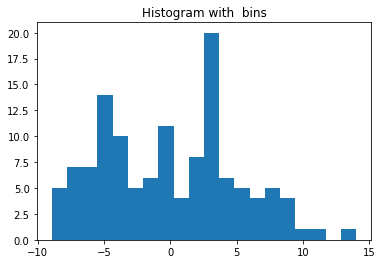

In [18]:
plt.hist(residuals, bins=20)  # arguments are passed to np.histogram
plt.title("Histogram with  bins")
plt.show()

### Chi Square goodness of fit test
c) A Chi-squared normality test of the residuals, and the interpretation of its outputs
Given simple linear equation Y = Β0 + Β1X

Null hypothesis (H0)= The expected and observed are of same distribution
Alternative hypothesis (H1)= The expected and observed are of not of same distribution

To find the Normal distribution. We follow the below steps

1) Take the Mean and Standard deviation of the logarithmic sample, the shape(mean**2)/var) and the scale (mean/var) parameters are estimated by using the sample data (along with the Maximum Likelihood Principle)

2) Check the Min and Max of the given array and based on those, we can decide on bins, and each bin having a width of equal units

In [19]:
residual = np.mean(residuals)
std_dev = np.std(residuals)

bins = [-float('inf')]
#bin 
for i in range(9):
    #percentile of each value of i
    p = (i+1)/10
    #Z statistic of normal probability
    z = norm.ppf(p)
    #upper bound and lower bound calculation
    bound = residual+z*std_dev
    print(p, format(z), format(bound))
    bins.append((bound))
bins.append(float('inf'))

0.1 -1.2815515655446004 -6.4768379260167235
0.2 -0.8416212335729142 -4.2534724871797
0.3 -0.5244005127080409 -2.6502695798172695
0.4 -0.2533471031357997 -1.2803918079871517
0.5 0.0 2.521280675277775e-15
0.6 0.2533471031357997 1.2803918079871566
0.7 0.5244005127080407 2.650269579817274
0.8 0.8416212335729143 4.253472487179705
0.9 1.2815515655446004 6.476837926016729


To calculate chi square we need to have both observed and expected values - below is to calculate observed and expected

List named Observed_Values is created

Append the observed values comparing each values in x_array list with upper and lower bound values

In [47]:
frequency = []
for i in range(10):
    observed, expected = sum(num >= bins[i] and num < bins[i+1] 
                             for num in df.Period), 150
    #print '{:2d}'format(observed),expected
    frequency.append((observed,expected))
    chi_square =(expected-observed)**2/observed
    chisquare_value = chi_square.sum()
    
print("Chisquare value for Residuals is",chisquare_value)

Chisquare value for Residuals is 8.677966101694915


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


#### d) A Normal probability plot of the residuals

Based on the Normal probability plot we can say the residuals are normally distributed.

In [88]:
# define our intput
X2 = sm.add_constant(X) # create a OLS model
model = sm.OLS(Y, X2)
# fit the data
est = model.fit()

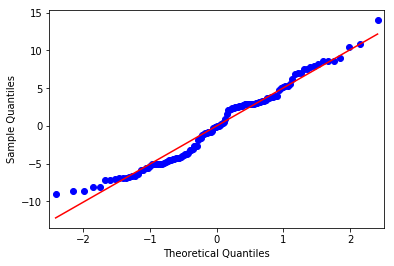

The mean of the residuals is 2.361e-14


In [89]:
import pylab
# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

e.	A scatter plot of residuals versus time to study their independency, and the interpretation of the shape of the scatter plot

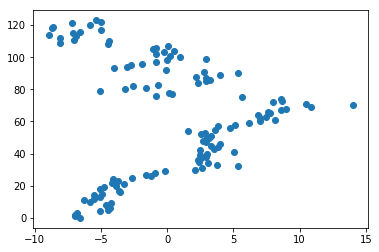

In [31]:
plt.scatter(residuals, period, marker='o')

f.	A scatter plot of residuals versus the predicted stock values to study their homoscedasticity, and the interpretation of the shape of the scatter plot

It is not normally distributed.

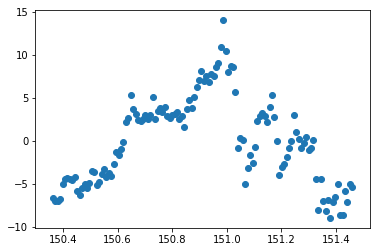

In [21]:
plt.scatter(y_predict, residuals, marker='o')

### Problem 3 - Conclusion

1) Chisquare value for Residuals is 8.67, the statistic value with degree of freedom 9 is 14. Since the chi suare value is less than the t-statistic we cannot reject the null hypothesis.

2) If all the independent variables were equal to zero, then the stock closure value of honeywell would be 151.46 on the 04/16/2018. Predicted close value of honeywell would be 151.46. If we looked at the close value while holding all the other independent variables constant, then we would say for a 1 unit increase in close value would lead to a 0.0089% increase in close value



# Problem 4

Perform a research to find out the actual Honeywell stock value on 4/16/2018, and compare this true value with your forecasts in this project. Among the forecasting methods that you have used in this project, what method has shown to be actually the most accurate method in predicting the Honeywell stock price for 4/16/2018?

The Stock close price on 4/16/2018 as per the Yahoo finance was 140.65, however, the price for 4/13/2018 is also 140.65 the given chart shows values as 143.75 for 4/13/2018. Hence, there is slight discripancy in the input values.

Ignorning the discripancy in the input values we can conclude that the forecasted value as below

1) Exponential smoothing at alpha 0.75 - 146.11 

2) Double exponential smoothing value at alpha 0.75 and beta = 0.15 = 146.07

3) Linear regression value of are the values - 151.46 ( Intercept 150 and coeficient 0.0089)

**Based on the above description, we can conclude that the double exponential smoothing has given the us the best forecasting value compared to exponential smoothing and simple linear forecasting**